<a href="https://colab.research.google.com/github/PashaIanko/Robust-Feature-Selection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [59]:
# Colab
from google.colab import drive

# paths
import os

# data
import pandas as pd

# sklearn
from sklearn.model_selection import train_test_split

In [54]:
# PEP 8 standard
%%capture 
!pip install pycodestyle 
!pip install --index-url https://test.pypi.org/simple/ nbpep8 
from nbpep8.nbpep8 import pep8

# Read the data

In [16]:
drive.mount('/content/gdrive')
datasets_folder_path = '/content/gdrive/MyDrive/ML/DataScience_Dataset 2022-2023'

assert os.path.isdir(datasets_folder_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 5. PHQ9_GAD7

## Download the data

In [33]:
def read_data(root_path, folder_name):
    if folder_name == '5. PHQ9_GAD7':
        
        phq9_gad_7_csv_path = os.path.join(
            datasets_folder_path,
            '5. PHQ9_GAD7',
            'PHQ9_GAD7_df.csv'
        )
        assert os.path.isfile(phq9_gad_7_csv_path)
        
        return pd.read_csv(
            phq9_gad_7_csv_path,
            sep=';'
        )

In [53]:
dataset = read_data(
    datasets_folder_path,
    '5. PHQ9_GAD7'
)

pep8(_ih)

In [35]:
dataset.head()

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,CONDITION
0,3,1,1,3,1,1,2,1,2,2,3,2,2,2,3,2,H
1,2,1,3,3,1,1,3,1,5,3,3,3,2,1,3,5,H
2,3,2,2,3,4,3,2,2,2,3,2,3,3,3,3,3,H
3,2,2,4,3,2,4,1,4,4,2,4,4,1,1,1,3,H
4,2,2,5,2,4,3,4,2,4,3,2,5,3,1,5,2,H


## Check the data

In [56]:
dataset.describe()

,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,PHQ9,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,3.252236,3.017889,3.538462,3.588551,3.313953,3.164580,2.967800,2.903399,3.265653,3.570662,3.722719,3.700358,3.118068,3.111807,3.445438,3.732558
std,1.470348,1.662597,1.421741,1.329620,1.504634,1.584876,1.649948,1.652855,1.619626,1.387345,1.265209,1.271765,1.586767,1.552721,1.340830,1.353742
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Data clean check

In [51]:
def check_data(dataset_):
    # Check is any NAN values
    assert dataset_.isna().sum().sum() == 0

    # Check that all values are in appropriate range
    assert (dataset_.values[:, :-1] <= 5).all() \
        & (dataset_.values[:, :-1] >= 0).all()

check_data(dataset)

### Class balance

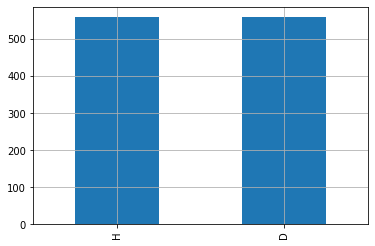

In [44]:
ax = dataset.CONDITION.value_counts().plot(kind='bar')
ax.grid()

## Create trainval + test sets

- Use stratified sampling, to support the same class balance in train, validation and test sets

In [66]:
TRAIN_SIZE = 0.8
RANDOM_STATE = 42

df_trainval, df_test = train_test_split(
    dataset,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE,
    stratify=dataset.CONDITION
)

print(df_trainval.shape, df_test.shape)

pep8(_ih)

(894, 17) (224, 17)



## Data exploration (on trainval set only)